<a href="https://colab.research.google.com/github/SuzanneOngCodes/Semantic-segmentation/blob/main/Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs

In [ ]:
#!pip install --upgrade matplotlib
import seaborn as sns
import plotly.express as px
import pandas as pd

%matplotlib inline
import plotly.io as pio

In [ ]:
df = pd.read_csv("Results.csv")

In [ ]:
df['Mean IoU in %'] = (df['Mean_IoU']*100).round(2)
df

,Unnamed: 0,Approach,Name,Architecture,Year,Mean_IoU,Mean_Pixel_Accuracy,Mean_Loss_from_Test_dataset,Mean IoU in %
0,0,1,"ResNext50, PSP Net with Adam",Adam,2016,0.732202,0.987942,0.158400,73.22
1,1,2,"ResNext50, PSP Net with SGD",SGD,2016,0.131509,0.773652,0.858116,13.15
2,2,3,"Res50, DeepLabV3 with Adam",Adam,2017,0.860769,0.645860,0.065824,86.08
3,3,4,"Res50, DeepLabV3 with SGD",SGD,2017,0.859857,0.135039,0.580613,85.99
4,4,5,"Res50, FCN with Adam",Adam,2015,0.976400,0.612000,0.308400,97.64
5,5,6,"Res50, FCN with SGD",SGD,2015,0.858987,0.527805,0.399364,85.90


In [ ]:
fig = px.bar(df, x="Approach", y='Mean IoU in %', color ="Architecture",text="Mean IoU in %", template="ggplot2", title="Evaluation of the mean intersection of union") 
fig.update_traces(textposition='outside')
fig.show()

[Text(0, 0, '73.22'),
 Text(0, 0, '13.15'),
 Text(0, 0, '86.08'),
 Text(0, 0, '85.99'),
 Text(0, 0, '97.64'),
 Text(0, 0, '85.9')]

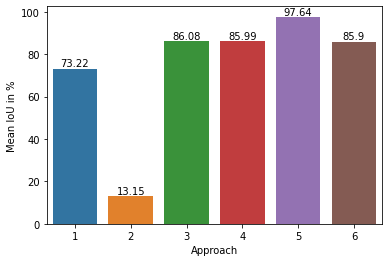

In [ ]:
sea = sns.barplot(x="Approach", y='Mean IoU in %', data=df.sort_values("Approach"))
sea.bar_label(sea.containers[0])

[Text(0, 0, '98.79'),
 Text(0, 0, '77.37'),
 Text(0, 0, '64.59'),
 Text(0, 0, '13.5'),
 Text(0, 0, '61.2'),
 Text(0, 0, '52.78')]

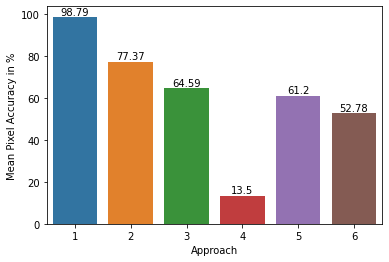

In [ ]:
df['Mean Pixel Accuracy in %'] = (df['Mean_Pixel_Accuracy']*100).round(2)
sea = sns.barplot(x="Approach", y='Mean Pixel Accuracy in %', data=df.sort_values("Approach"))
sea.bar_label(sea.containers[0])

[Text(0, 0, '84'),
 Text(0, 0, '14'),
 Text(0, 0, '93'),
 Text(0, 0, '42'),
 Text(0, 0, '69'),
 Text(0, 0, '60')]

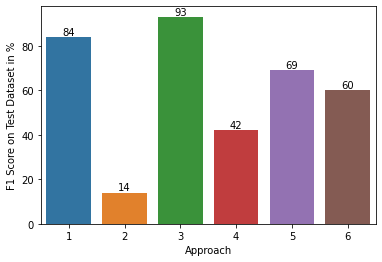

In [ ]:
df['F1 Score on Test Dataset in %'] = (1 - df['Mean_Loss_from_Test_dataset'].round(2) )*100
sea = sns.barplot(x="Approach", y='F1 Score on Test Dataset in %', data=df.sort_values("Approach"))
sea.bar_label(sea.containers[0])

In [ ]:
fig2 = px.bar(df, x="Approach", y='Mean Pixel Accuracy in %', color ="Architecture", text="Mean Pixel Accuracy in %", template="ggplot2", title="Evaluation of the mean pixel accuracy") 
fig2.update_traces(textposition='outside')
fig2.show()

In [ ]:
df['F1 Score on Test Dataset in %']= df['F1 Score on Test Dataset in %'].round()
fig3 = px.bar(df, x="Approach", y='F1 Score on Test Dataset in %', color ="Architecture",text='F1 Score on Test Dataset in %', template="ggplot2", title="Evaluation of the F1 Score on Test Dataset") 
fig3.update_traces(textposition='outside')
fig3.show()

In [ ]:
## Benchmarking
df1 = pd.DataFrame(dict(
    Name = ["PSP Net", "DeepLabV3", "FCN", "PSP Net (Wigness's)", "UperNet", "PSP Net (Guan's)", "SegFormer", "GANav-r8", "FastSCNN"],
    Status = ["Current","Current","Current","Wigness", "Wigness","Guan","Guan","Guan","Guan"],
    Year = [2016, 2017, 2015, 2016, 2018, 2016, 2021, 2021, 2019],
    Mean_IoU = [73.22020212022388, 86.07686485641043,  97.64, 31.78,31.95,  67.06, 86.83, 89.08, 85.11 ],
    Mean_Pixel_Accuracy = [98.79419815422282, 64.58599332282607, 61.20, 52.96,50.72, 92.85,95.17, 95.66, 94.77],
))

df1.to_csv("Benchmark.csv")

In [ ]:
df1['Mean IoU in %'] = df1["Mean_IoU"].round(2)
df1['Mean Pixel Accuracy in %'] = df1["Mean_Pixel_Accuracy"].round(2)
df1

,Name,Status,Year,Mean_IoU,Mean_Pixel_Accuracy,Mean IoU in %,Mean Pixel Accuracy in %
0,PSP Net,Current,2016,73.220202,98.794198,73.22,98.79
1,DeepLabV3,Current,2017,86.076865,64.585993,86.08,64.59
2,FCN,Current,2015,97.640000,61.200000,97.64,61.20
3,PSP Net (Wigness's),Wigness,2016,31.780000,52.960000,31.78,52.96
4,UperNet,Wigness,2018,31.950000,50.720000,31.95,50.72
5,PSP Net (Guan's),Guan,2016,67.060000,92.850000,67.06,92.85
6,SegFormer,Guan,2021,86.830000,95.170000,86.83,95.17
7,GANav-r8,Guan,2021,89.080000,95.660000,89.08,95.66
8,FastSCNN,Guan,2019,85.110000,94.770000,85.11,94.77


In [ ]:
fig4 = px.scatter(df1, x="Year", y='Mean Pixel Accuracy in %', color ="Status", hover_name="Name", template="ggplot2", title="Benchmarking on the mean pixel accuracy") 
fig4.show()

In [ ]:
fig5 = px.scatter(df1, x="Year", y='Mean IoU in %', color ="Status", hover_name="Name", template="ggplot2", title="Benchmarking on the mean IoU") 
fig5.show()

In [ ]:
## Interactive figures
pio.write_html(fig, file='figure.html', auto_open=True)
pio.write_html(fig2, file='figure2.html', auto_open=True)
pio.write_html(fig3, file='figure3.html', auto_open=True)
pio.write_html(fig4, file='figure4.html', auto_open=True)
pio.write_html(fig5, file='figure5.html', auto_open=True)

# Prediction image and video

In [17]:
## Image staking
import cv2
import numpy as np
import sys
from PIL import Image

for i in range(500):
    image1 = Image.open("PSPNet + Adam/pred_" +str(i)+".png")
    image2 = Image.open("PSP + SGD/pred_" +str(i)+".png")
    image3 = Image.open("Deeplab + Adam/pred_" +str(i)+".png")
    image4 = Image.open("Deeplab + SGD"+"/pred_" +str(i)+".png")
    image5 = Image.open("FCN + Adam"+"/pred_" +str(i)+".png")
    image6 = Image.open("FCN + SGD"+"/pred_" +str(i)+".png")

    img_0_size = image1.size
    img_01_size = image2.size
    new_im = Image.new('RGB', (4*img_01_size[0],2*img_01_size[1]), (250,250,250))

    new_im.paste(image1, (0,0))
    new_im.paste(image2, (img_0_size[0],0))
    new_im.paste(image3, (0,img_01_size[1]))
    new_im.paste(image4, (img_01_size[0],img_01_size[1]))
    new_im.paste(image5, (2*img_01_size[0],img_01_size[1]))
    new_im.paste(image6, (3*img_01_size[0],img_01_size[1]))

    new_im.show()
    new_im.save("/content/merged/"+str(i)+".png", "PNG")

In [ ]:
## Better results (Adam's)
!mkdir Adam
for i in range(500):
    image1 = Image.open("PSPNet + Adam/pred_" +str(i)+".png")
    image3 = Image.open("Deeplab + Adam/pred_" +str(i)+".png")
    image5 = Image.open("FCN + Adam"+"/pred_" +str(i)+".png")

    img_0_size = image1.size
    img_01_size = image3.size
    new_im = Image.new('RGB', (5*img_01_size[0], img_01_size[1]), (250,250,250))

    new_im.paste(image1, (0,0))
    new_im.paste(image3, (img_0_size[0],0))
    new_im.paste(image5, (img_0_size[0] + img_01_size[0],0))

    new_im.save("/content/Adam/"+str(i)+".png", "PNG")
    new_im.show()

In [49]:
## Poorer results (SGD's)
!mkdir SGD
for i in range(500):
    image1 = Image.open("PSPNet + Adam/pred_" +str(i)+".png")
    image2 = Image.open("PSP + SGD/pred_" +str(i)+".png")
    image4 = Image.open("Deeplab + SGD"+"/pred_" +str(i)+".png")
    image6 = Image.open("FCN + SGD"+"/pred_" +str(i)+".png")

    img_0_size = image1.size
    img_01_size = image3.size
    new_im = Image.new('RGB', (5*img_01_size[0], img_01_size[1]), (250,250,250))

    new_im.paste(image1, (0,0))
    new_im.paste(image2, (img_0_size[0] - img_01_size[0] ,0))
    new_im.paste(image4, (img_0_size[0],0))
    new_im.paste(image6, (img_0_size[0]+img_01_size[0],0))

    new_im.save("/content/SGD/"+str(i)+".png", "PNG")
    new_im.show()

mkdir: cannot create directory ‘SGD’: File exists


In [ ]:
## Videos
import os

img_array=[]
for i in range(500):
    img = cv2.imread( "merged/"+ str(i)+'.png')
    height,width,layers=img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

img_array=[]
for i in range(500):
    img = cv2.imread( "Adam/"+ str(i)+'.png')
    height,width,layers=img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('projectAdam.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

img_array=[]
for i in range(500):
    img = cv2.imread( "SGD/"+ str(i)+'.png')
    height,width,layers=img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('projectSGD.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()